In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pickle

In [38]:
data = pd.read_csv("Rainfall.csv")
data['rainfall'] = data['rainfall'].astype(str).str.strip().str.lower().map({'yes': 1, 'no': 0})#1 = yes reainfall, 0 = no rainfall
data.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,1,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,1,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,1,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,1,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,1,0.0,40.0,13.7


In [39]:
data.shape

(366, 12)

In [40]:
data["day"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
      dtype=int64)

In [41]:
print("Data Info:")
data.info()

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    int64  
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(4)
memory usage: 34.4 KB


In [42]:
data.columns

Index(['day', 'pressure ', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity ', 'cloud ', 'rainfall', 'sunshine', '         winddirection',
       'windspeed'],
      dtype='object')

In [43]:
# remove extra  spaces in all columns
data.columns = data.columns.str.strip()

In [44]:
data.columns

Index(['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity', 'cloud', 'rainfall', 'sunshine', 'winddirection',
       'windspeed'],
      dtype='object')

In [45]:
data = data.drop(columns=["day"], errors='ignore')


In [46]:
data.columns

Index(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud', 'rainfall', 'sunshine', 'winddirection', 'windspeed'],
      dtype='object')

In [47]:
# checking the number of missing values
print(data.isnull().sum())

pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    1
windspeed        1
dtype: int64


In [48]:
data["winddirection"].unique()

array([ 80.,  50.,  40.,  20.,  30.,  60.,  70.,  10., 200., 220., 120.,
       190., 210., 300., 240., 180., 230.,  90., 170., 150., 100., 130.,
        nan, 160., 270., 280., 250., 260., 290., 350., 110., 140.])

In [49]:
#handle of missing values
data['winddirection'] = data['winddirection'].fillna(data['winddirection'].mode()[0])
data['windspeed'] = data['windspeed'].fillna(data['windspeed'].median())

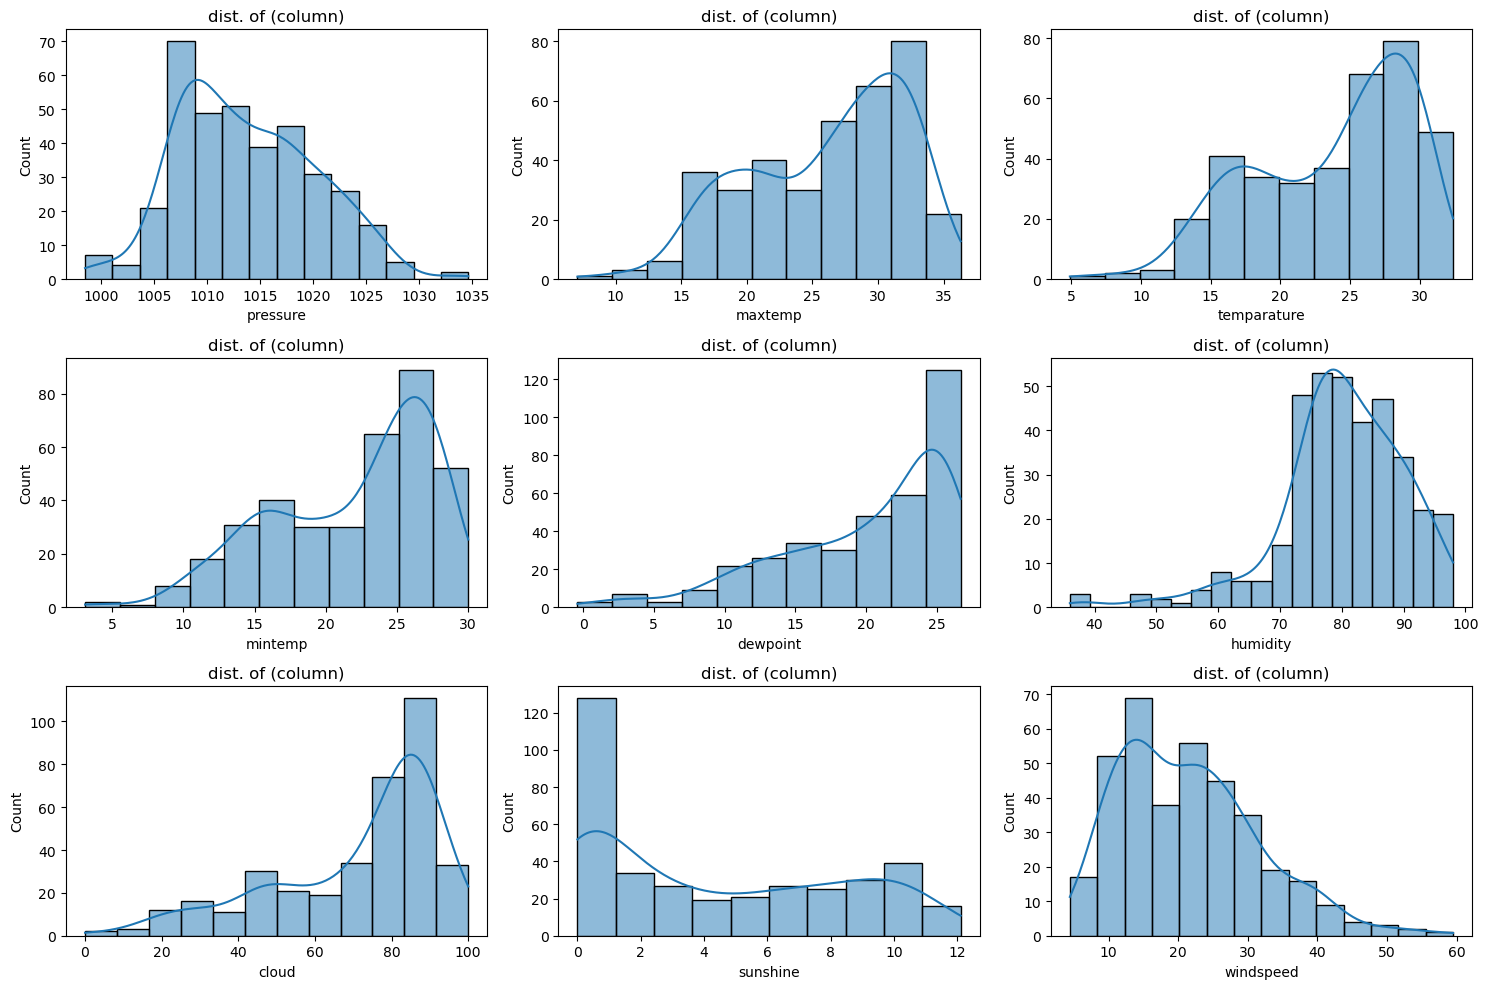

In [50]:
plt.figure(figsize=(15,10))
for i, column in enumerate(['pressure','maxtemp','temparature','mintemp','dewpoint','humidity','cloud','sunshine','windspeed'],1):
  plt.subplot(3,3,i)
  sns.histplot(data[column],kde=True)
  plt.title(f"dist. of (column)")
plt.tight_layout()
plt.show()

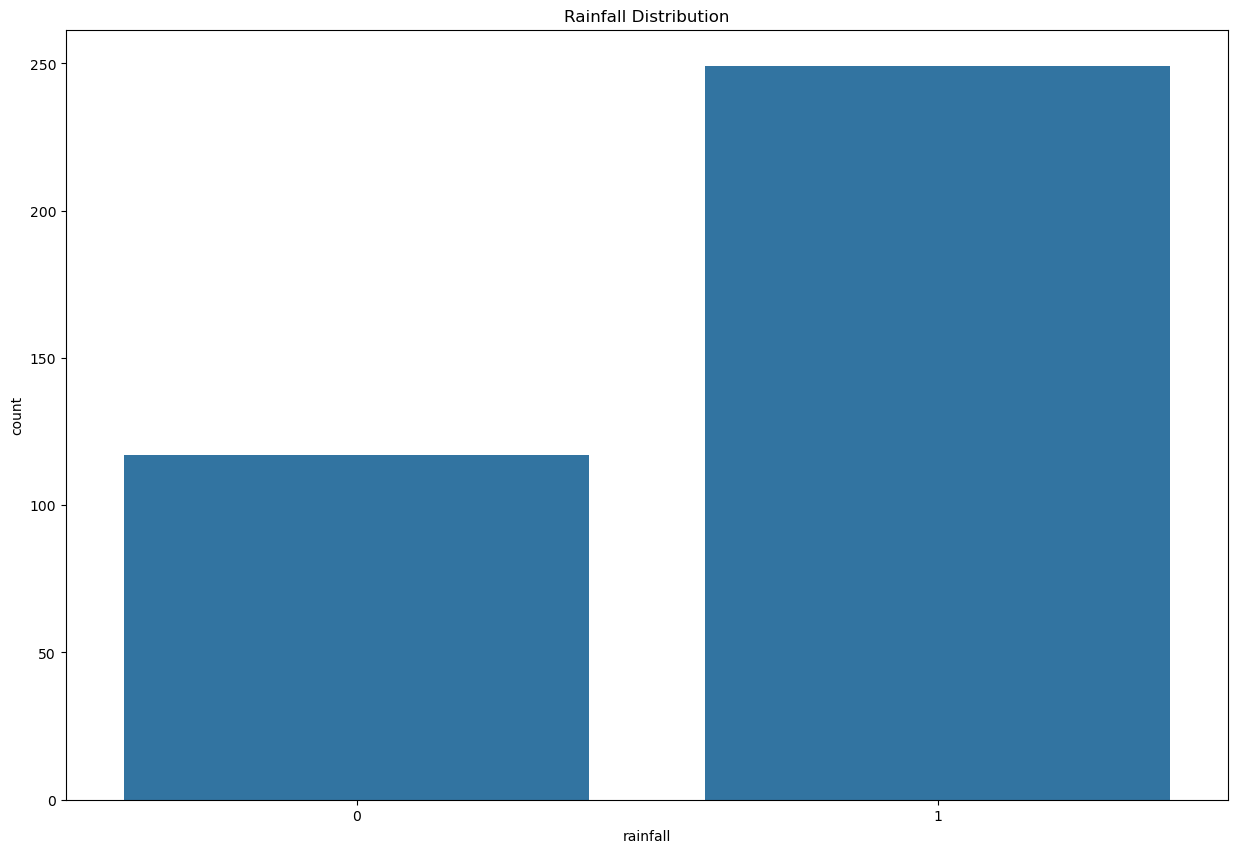

In [51]:
plt.figure(figsize=(15,10))
sns.countplot(x="rainfall",data=data)
plt.title("Rainfall Distribution")
plt.show()

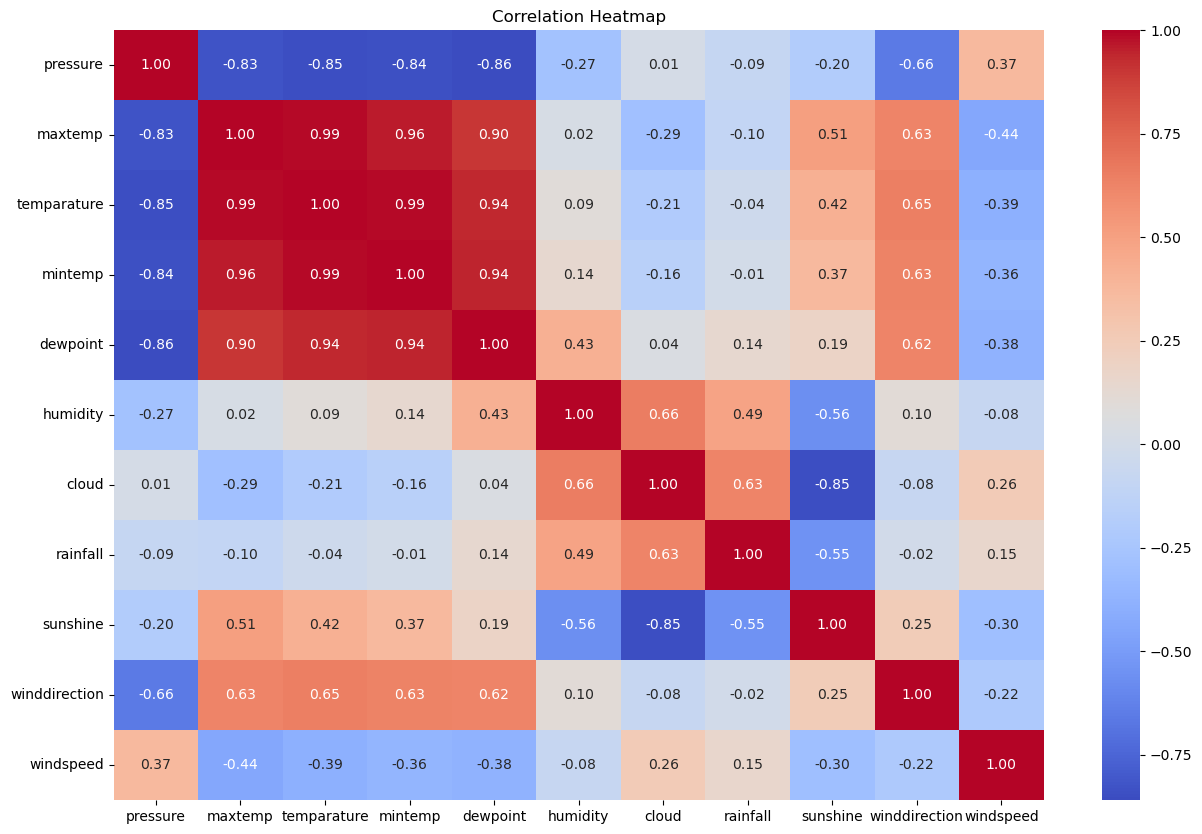

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
sns.heatmap(data.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


In [53]:
data.describe()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,1013.742623,26.191257,23.747268,21.894536,19.989071,80.177596,71.128415,0.680328,4.419399,101.284153,21.534153
std,6.414776,5.978343,5.632813,5.594153,5.997021,10.062470,21.798012,0.466988,3.934398,81.722827,10.056054
min,998.500000,7.100000,4.900000,3.100000,-0.400000,36.000000,0.000000,0.000000,0.000000,10.000000,4.400000
25%,1008.500000,21.200000,18.825000,17.125000,16.125000,75.000000,58.000000,0.000000,0.500000,40.000000,13.725000
50%,1013.000000,27.750000,25.450000,23.700000,21.950000,80.500000,80.000000,1.000000,3.500000,70.000000,20.500000
75%,1018.100000,31.200000,28.600000,26.575000,25.000000,87.000000,88.000000,1.000000,8.200000,190.000000,27.825000
max,1034.600000,36.300000,32.400000,30.000000,26.700000,98.000000,100.000000,1.000000,12.100000,350.000000,59.500000


In [54]:
data.columns

Index(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud', 'rainfall', 'sunshine', 'winddirection', 'windspeed'],
      dtype='object')

In [55]:
#dropping unnecessary columns
data = data.drop(columns=["maxtemp", "temperature","mintemp"], errors='ignore')
data.head()

,pressure,temparature,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,18.3,13.1,72,49,1,9.3,80.0,26.3
1,1022.0,18.9,15.6,81,83,1,0.6,50.0,15.3
2,1019.7,19.3,18.4,95,91,1,0.0,40.0,14.2
3,1018.9,20.6,18.8,90,88,1,1.0,50.0,16.9
4,1015.9,20.7,19.9,95,81,1,0.0,40.0,13.7


In [56]:
data["rainfall"].value_counts()

rainfall
1    249
0    117
Name: count, dtype: int64

In [57]:
#separate majority and minority classes
majority = data[data.rainfall == 1]
minority = data[data.rainfall == 0]

In [58]:
print("Majority class shape:", majority.shape)
print("Minority class shape:", minority.shape)

Majority class shape: (249, 9)
Minority class shape: (117, 9)


In [59]:
majority_downsampled = resample(majority,replace=False,n_samples=len(minority),random_state=42)     # sample without replacement

In [60]:
majority_downsampled.shape

(117, 9)

In [61]:
downsampled = pd.concat([majority_downsampled, minority])#here we create our final data frame

In [62]:
downsampled.shape

(234, 9)

In [63]:
downsampled.head()

,pressure,temparature,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
188,1005.9,30.2,25.6,77,53,1,10.5,270.0,11.3
9,1017.5,18.0,15.5,85,91,1,0.0,70.0,37.7
137,1012.3,23.7,20.1,80,86,1,0.3,80.0,39.5
89,1018.3,20.0,16.3,79,89,1,2.4,40.0,14.8
157,1008.8,26.2,24.7,91,80,1,2.2,20.0,11.2


In [64]:
downsampled= downsampled.sample(frac=1, random_state=42).reset_index(drop=True)  # Shuffle the dataset
downsampled.head()

,pressure,temparature,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1022.2,18.0,14.1,78,90,1,0.0,30.0,28.5
1,1013.4,26.2,19.5,69,17,0,10.5,70.0,12.4
2,1006.1,29.6,24.4,74,27,0,10.8,220.0,8.7
3,1007.6,27.6,24.8,85,84,1,1.8,70.0,34.8
4,1021.2,14.8,8.4,66,18,0,10.1,20.0,24.4


In [73]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer

# 1. Features and target
X = downsampled.drop(columns=['rainfall'])
y = downsampled['rainfall']

# 2. Handle missing values
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# 3. Train-Test Split (with stratify)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 4. Optimized Random Forest configuration with parameters
model = RandomForestClassifier(
    n_estimators=200,# increased number of trees for better performance
    max_depth=18, # increased depth for capturing more complex patterns
    min_samples_split=3,# increased to allow more splits
    min_samples_leaf=2,# reduced to allow more leaf nodes
    max_features='sqrt',# using square root of features for splits
    class_weight='balanced_subsample',  # helps if mild imbalance
    random_state=50# to ensure reproducibility
)

# 5. Train
model.fit(X_train, y_train)

# 6. Evaluate on Test Set
y_pred = model.predict(X_test)
print("✅ Test Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n📈 Classification Report:\n", classification_report(y_test, y_pred))

# 7. Cross-validation score
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print(f"\n🔁 Mean CV Accuracy: {cv_scores.mean():.4f}")
print("📊 All CV Scores:", cv_scores)

✅ Test Accuracy: 0.8297872340425532

📊 Confusion Matrix:
 [[20  4]
 [ 4 19]]

📈 Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83        24
           1       0.83      0.83      0.83        23

    accuracy                           0.83        47
   macro avg       0.83      0.83      0.83        47
weighted avg       0.83      0.83      0.83        47


🔁 Mean CV Accuracy: 0.8036
📊 All CV Scores: [0.78723404 0.76595745 0.78723404 0.82978723 0.84782609]


In [66]:
y_pred= model.predict(X_test)
r2 = accuracy_score(y_test, y_pred)
print("R² Score:", r2)

R² Score: 0.8297872340425532


In [67]:
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", np.mean(cv_scores))

Cross-validation scores: [0.78947368 0.73684211 0.86486486 0.75675676 0.86486486]
Mean CV score: 0.8025604551920342


In [68]:
data

,pressure,temparature,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,18.3,13.1,72,49,1,9.3,80.0,26.3
1,1022.0,18.9,15.6,81,83,1,0.6,50.0,15.3
2,1019.7,19.3,18.4,95,91,1,0.0,40.0,14.2
3,1018.9,20.6,18.8,90,88,1,1.0,50.0,16.9
4,1015.9,20.7,19.9,95,81,1,0.0,40.0,13.7
...,...,...,...,...,...,...,...,...,...
361,1022.7,17.7,15.0,84,90,1,0.0,30.0,18.4
362,1026.6,17.3,12.8,75,85,1,1.0,20.0,25.9
363,1025.9,17.7,13.3,75,78,1,4.6,70.0,33.4
364,1025.3,17.3,13.3,78,86,1,1.2,20.0,20.9


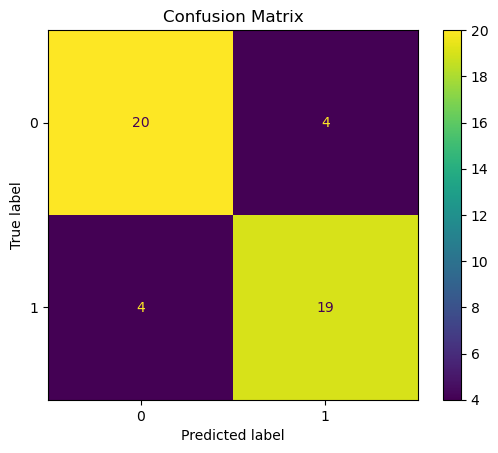

In [69]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.title("Confusion Matrix")
plt.show()


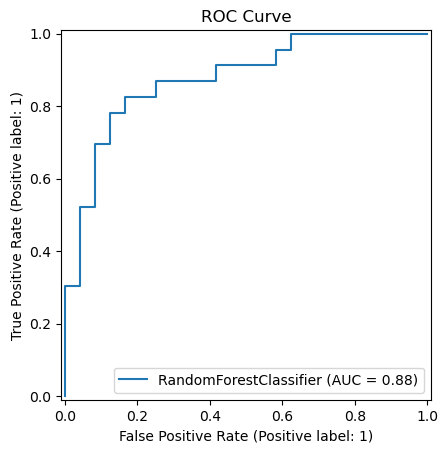

In [70]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.title("ROC Curve")
plt.show()


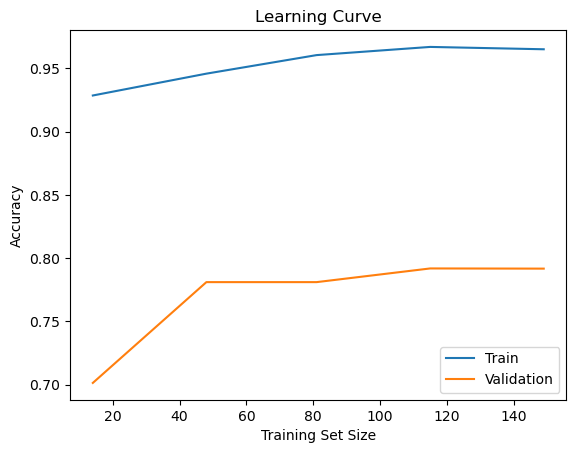

In [71]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(
    model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)

train_mean = train_scores.mean(axis=1)
val_mean = val_scores.mean(axis=1)

plt.plot(train_sizes, train_mean, label="Train")
plt.plot(train_sizes, val_mean, label="Validation")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve")
plt.legend()
plt.show()
